In [12]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc


In [13]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/MnOxSpEC/2024-07-30/run2/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/MnOxSpEC/2024-07-30/run2/CV-3.3.0.0__0.csv


1
Fitted parameters saved to the interpolation attribute are:
        Amplitude:1.5017564185014964
        Period:600.1233717176103
        Phase: -1.3616101997493464 
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


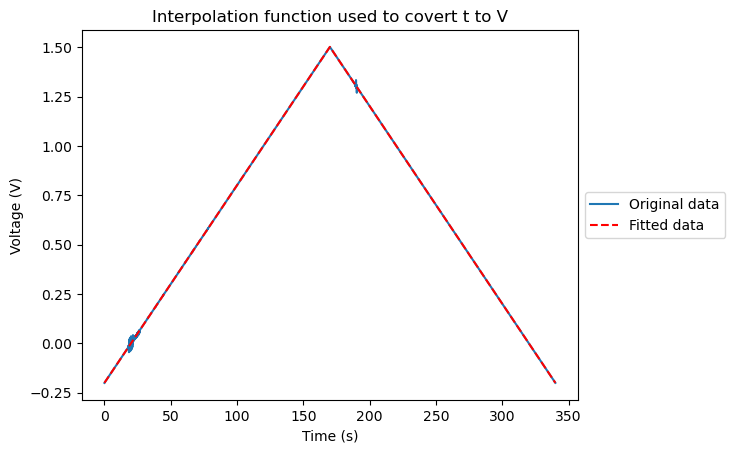

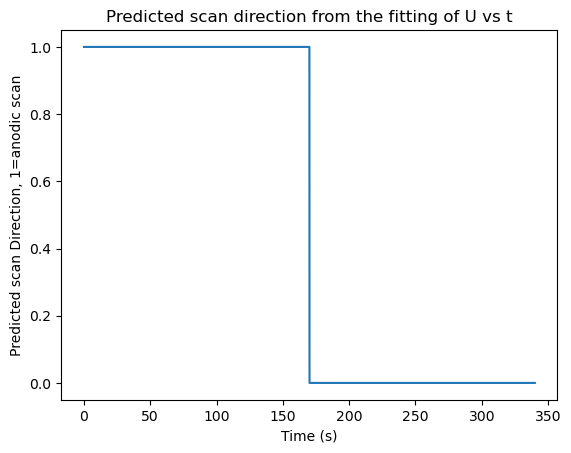

In [14]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

In [15]:
SpEC1.spec_scans[0]['Anodic']

Wavelength (nm),Voltage (V),399.992645,400.206268,400.419922,400.633545,400.847198,401.060791,401.274445,401.488098,401.701721,...,939.882324,940.091309,940.300293,940.509399,940.718384,940.927307,941.136353,941.345337,941.554321,941.763306
Time (s),,,,,,,,,,,,,,,,,,,,,
0.010200,-0.199890,149817,139697,138238,138984,141011,143456,146305,146562,147065,...,515507,511606,513962,509836,509023,509484,507914,505460,499255,470548
0.020401,-0.199788,149097,141207,138194,138446,141398,143891,146144,146427,146279,...,516172,510023,512856,509127,509813,512696,509360,502669,501443,474110
0.030601,-0.199686,148123,139148,138629,139340,141152,144560,146677,145632,146975,...,517038,511133,513644,511792,508211,509933,509227,503710,500112,472730
0.040801,-0.199584,149022,139937,138911,139473,141110,144498,146326,147168,147170,...,514488,511279,512629,511044,509997,510908,508900,504766,499515,471105
0.051002,-0.199481,148410,139437,138078,139762,141463,144032,146032,143990,147251,...,517854,510488,513910,509065,510625,508778,508455,506669,498795,470894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169.968233,1.501331,146794,136760,136132,136159,138227,141448,143778,143563,144245,...,483126,479125,481599,477400,477376,479801,477162,471991,467201,442368
169.978433,1.501433,146450,137077,134842,135902,138350,141420,144599,142142,142867,...,484195,479257,479601,478157,477456,479368,475815,474128,469406,442605
169.988633,1.501535,146444,137898,135110,137028,137354,140949,143623,141637,143597,...,484102,478735,479861,479687,475648,478541,475644,473495,469593,442966


(17001, 2)


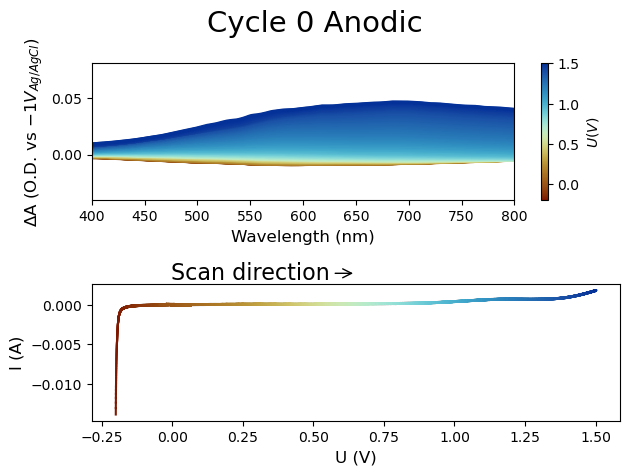

(17000, 2)


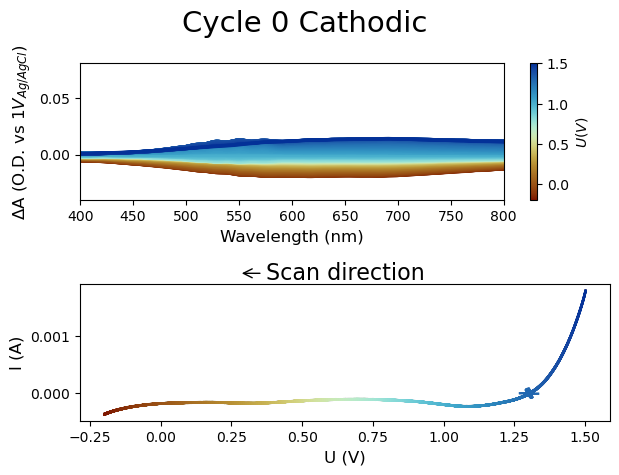

In [16]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -1, 21)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 1, 21)
            sp.Co_plot_DOD_and_CV(test,
                                   CV,
                                     Title=f'Cycle {key} {key2}',
                                       y_max=0.08, y_min=-0.04,
                                         x_min=400, x_max=800,
                                           reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                             scan_direction=key2,
                                               cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 1V_{Ag/AgCl}$)'>)

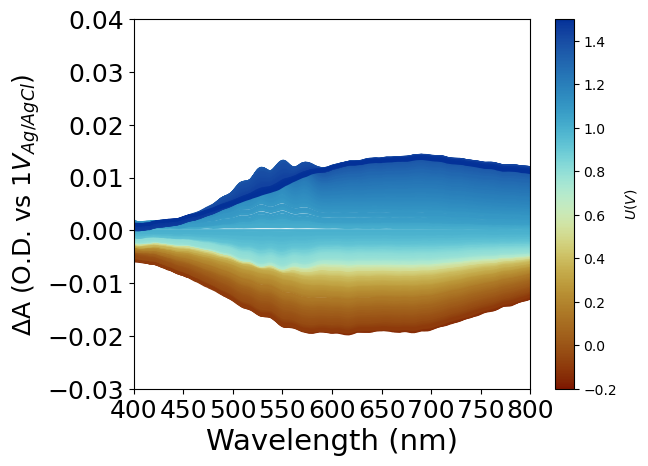

In [17]:
data, ref=sp.calculateDOD(SpEC1, 0, 'Cathodic', 1, 21)
sp.plot_DOD(data, y_max=0.04, y_min=0-0.03, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [18]:
lit_abs_path= sp.select_file_path()

lit_abs=pd.read_csv(lit_abs_path)

exp_abs= sp.select_file_path()

exp_abs=pd.read_csv(exp_abs)




UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [ ]:
plt.plot(exp_abs.iloc[:,0], exp_abs.iloc[:,1], label='Experimental Absorption')

# set the y label to Absolute absorbance
plt.ylabel('Absolute Absorbance')

# set the x label to Wavelength (nm)
plt.xlabel('Wavelength (nm)')

# set the title to Absorption Spectrum of 2 mM resorufin solution
plt.title('Absorption Spectrum of 2 mM resorufin solution')


In [ ]:
exp_abs.iloc[:,1]=exp_abs.iloc[:,1]/np.max(exp_abs.iloc[:,1])



In [ ]:
lit_abs.iloc[:,1]=lit_abs.iloc[:,1]/np.max(lit_abs.iloc[:,1])


In [ ]:
data2=data.abs()

dataN=sp.normalise_DOD(data2)

dataN2=dataN.iloc[:,0:-350]

sp.plot_DOD(dataN2, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"($ {ref}V_{{Ag/AgCl}}$), Norm.")

plt.plot(exp_abs.iloc[:,0], exp_abs.iloc[:,1], label='Mesured absolute absorbance of the solution', color='black', linestyle='dashdot')

plt.plot(lit_abs.iloc[:,0], lit_abs.iloc[:,1], label='Literature Rf Absolute absorbance', color='red', linestyle='dashed')

# make a ledgend above the plot, with no frame 

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, frameon=False)